In [1]:
import pandas as pd
import numpy as np

# Cargar las bases de datos
produccion_df = pd.read_csv("produccion(1).csv")
test_df = pd.read_csv("TEST21.csv")

# Verificar valores faltantes en la base de datos de producción
missing_values_produccion = produccion_df.isnull().sum()
print("Valores faltantes en la base de datos de producción:")
print(missing_values_produccion)

# Verificar valores faltantes en la base de datos de test
missing_values_test = test_df.isnull().sum()
print("\nValores faltantes en la base de datos de test:")
print(missing_values_test)

Valores faltantes en la base de datos de producción:
ANIO           0
MES            0
DIAS           0
OPERACION      0
ACTIVO         0
BLOQUE_N       0
ROUTE_NAME     0
PAD            0
POZO           0
COMP_S_NAME    0
PC_BPPD        0
WAT            0
GAS            0
dtype: int64

Valores faltantes en la base de datos de test:
COMP_S_NAME         0
EFF_DT              0
T_HRS               0
TEST_OIL_24         0
TEST_GAS_24         0
TEST_WAT_24         0
GRAV_OIL_API        6
BSW                 0
CASING_PRESS       12
PBHP               10
TUBING_PRESS        4
PIP                 8
FLAP               10
SBHP                2
GAS_SP_GRAVITY     12
TUBING_TMP          0
AMPS_A             52
PUMP_TMP           52
MOTOR_HZ            0
POWER_KW           10
STAGE_COUNT         6
VOLTAGE             8
INTAKE_DEPTH        6
PUMP_TYPE         104
SALINIDAD           6
INJECTION_VOL       0
RETURN_VOL          0
dtype: int64


LMIPIEZA Y PROCESAMIENTO DE DATOS

In [2]:
import pandas as pd
import numpy as np

# Función para imputar la media o mediana agrupada por COMP_S_NAME
def impute_grouped_data(df, column, method='mean'):
    if method == 'median':
        return df.groupby('COMP_S_NAME')[column].transform(lambda x: x.fillna(x.median()))
    elif method == 'linear':
        return df[column].interpolate(method='linear')
    else:
        return df.groupby('COMP_S_NAME')[column].transform(lambda x: x.fillna(x.mean()))

# Cargar las bases de datos
produccion_df = pd.read_csv("produccion(1).csv")
test_df = pd.read_csv("TEST21.csv")

# Eliminar duplicados
produccion_df = produccion_df.drop_duplicates()
test_df = test_df.drop_duplicates()

# Eliminar filas con valores faltantes en columnas no críticas
critical_columns_produccion = ['ANIO', 'MES', 'DIAS', 'OPERACION', 'ACTIVO', 'BLOQUE_N', 'ROUTE_NAME', 'PAD', 'POZO', 'COMP_S_NAME']
critical_columns_test = ['BSW', 'CASING_PRESS', 'PBHP', 'TUBING_PRESS', 'PIP', 'FLAP', 'SBHP', 'TUBING_TMP', 'AMPS_A', 'PUMP_TMP', 'MOTOR_HZ', 'POWER_KW', 'STAGE_COUNT', 'VOLTAGE', 'INTAKE_DEPTH', 'PUMP_TYPE', 'SALINIDAD', 'INJECTION_VOL', 'RETURN_VOL']

produccion_df = produccion_df.dropna(subset=critical_columns_produccion)
test_df = test_df.dropna(subset=critical_columns_test)

# Imputar valores faltantes en columnas seleccionadas con el método recomendado
produccion_df['PC_BPPD'] = impute_grouped_data(produccion_df, 'PC_BPPD', method='median')
produccion_df['WAT'] = impute_grouped_data(produccion_df, 'WAT', method='median')
produccion_df['GAS'] = impute_grouped_data(produccion_df, 'GAS', method='linear')

test_df['GRAV_OIL_API'] = impute_grouped_data(test_df, 'GRAV_OIL_API', method='linear')
test_df['GAS_SP_GRAVITY'] = impute_grouped_data(test_df, 'GAS_SP_GRAVITY', method='linear')

# Los datos están ahora limpios y listos para su uso posterior en el código

MATRICES

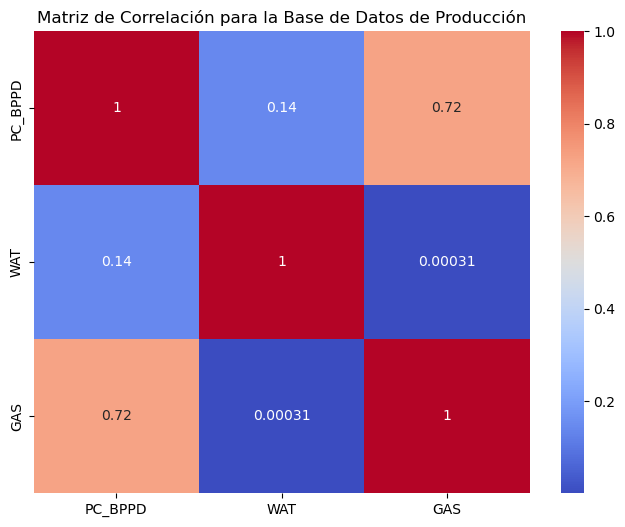

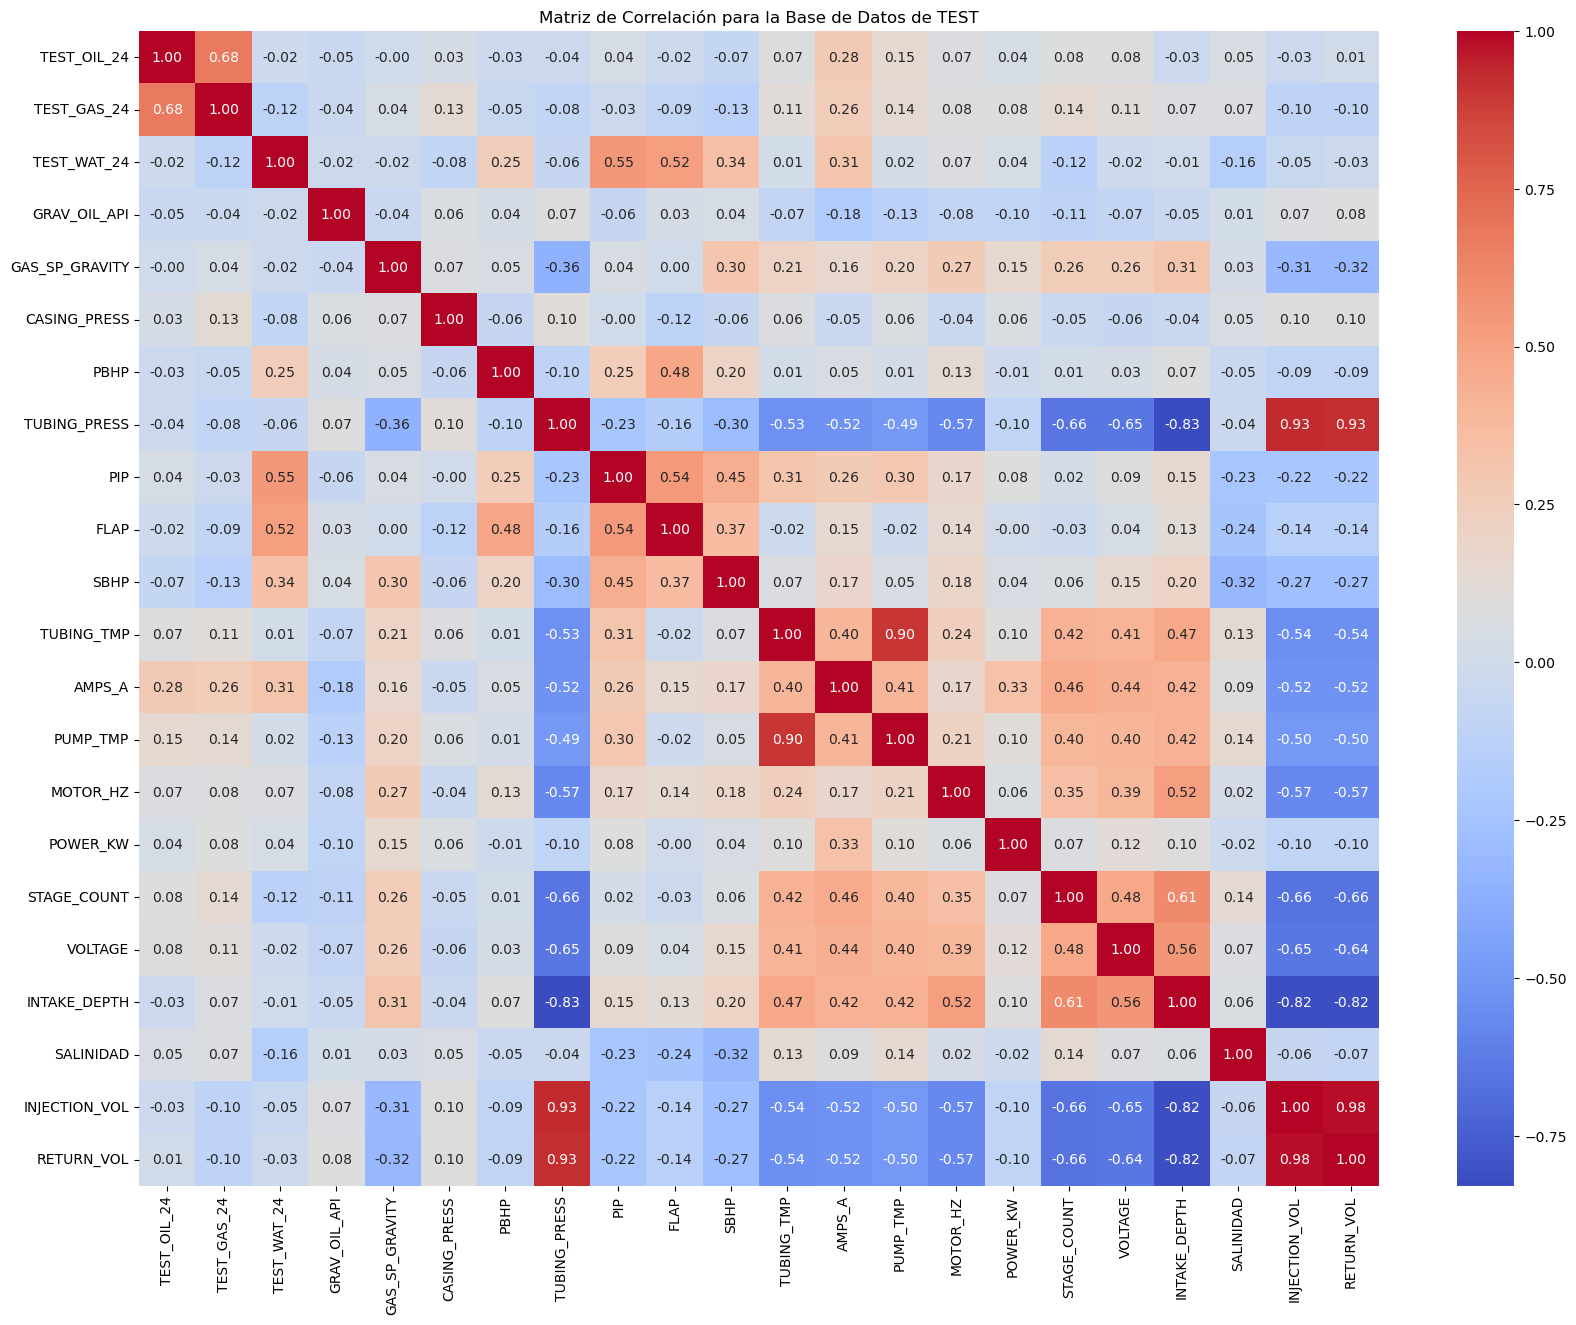

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Función para imputar la media o mediana agrupada por COMP_S_NAME
def impute_grouped_data(df, column, method='mean'):
    if method == 'median':
        return df.groupby('COMP_S_NAME')[column].transform(lambda x: x.fillna(x.median()))
    elif method == 'linear':
        return df[column].interpolate(method='linear')
    else:
        return df.groupby('COMP_S_NAME')[column].transform(lambda x: x.fillna(x.mean()))

# Cargar las bases de datos
produccion_df = pd.read_csv("produccion(1).csv")
test_df = pd.read_csv("TEST21.csv")

# Eliminar duplicados
produccion_df = produccion_df.drop_duplicates()
test_df = test_df.drop_duplicates()

# Eliminar filas con valores faltantes en columnas críticas
critical_columns_produccion = ['ANIO', 'MES', 'DIAS', 'OPERACION', 'ACTIVO', 'BLOQUE_N', 'ROUTE_NAME', 'PAD', 'POZO', 'COMP_S_NAME']
critical_columns_test = ['BSW', 'CASING_PRESS', 'PBHP', 'TUBING_PRESS', 'PIP', 'FLAP', 'SBHP', 'TUBING_TMP', 'AMPS_A', 'PUMP_TMP', 'MOTOR_HZ', 'POWER_KW', 'STAGE_COUNT', 'VOLTAGE', 'INTAKE_DEPTH', 'PUMP_TYPE', 'SALINIDAD', 'INJECTION_VOL', 'RETURN_VOL']

produccion_df = produccion_df.dropna(subset=critical_columns_produccion)
test_df = test_df.dropna(subset=critical_columns_test)

# Imputar valores faltantes en columnas seleccionadas con el método recomendado
produccion_df['PC_BPPD'] = impute_grouped_data(produccion_df, 'PC_BPPD', method='median')
produccion_df['WAT'] = impute_grouped_data(produccion_df, 'WAT', method='median')
produccion_df['GAS'] = impute_grouped_data(produccion_df, 'GAS', method='linear')

test_df['GRAV_OIL_API'] = impute_grouped_data(test_df, 'GRAV_OIL_API', method='linear')
test_df['GAS_SP_GRAVITY'] = impute_grouped_data(test_df, 'GAS_SP_GRAVITY', method='linear')

# Calcular la matriz de correlación para la base de datos de Producción
correlation_matrix_produccion = produccion_df[['PC_BPPD', 'WAT', 'GAS']].corr()
# Visualizar la matriz de correlación con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_produccion, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación para la Base de Datos de Producción')
plt.show()

# Calcular la matriz de correlación para la base de datos de Test
correlation_matrix_test = test_df[['TEST_OIL_24', 'TEST_GAS_24', 'TEST_WAT_24', 'GRAV_OIL_API', 'GAS_SP_GRAVITY', 'CASING_PRESS', 'PBHP', 'TUBING_PRESS', 'PIP', 'FLAP', 'SBHP', 'TUBING_TMP', 'AMPS_A', 'PUMP_TMP', 'MOTOR_HZ', 'POWER_KW', 'STAGE_COUNT', 'VOLTAGE', 'INTAKE_DEPTH', 'SALINIDAD', 'INJECTION_VOL', 'RETURN_VOL']].corr()
# Visualizar la matriz de correlación con Seaborn
plt.figure(figsize=(20, 15))  # Aumentar el tamaño de la figura para acomodar todas las variables
sns.heatmap(correlation_matrix_test, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación para la Base de Datos de TEST')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

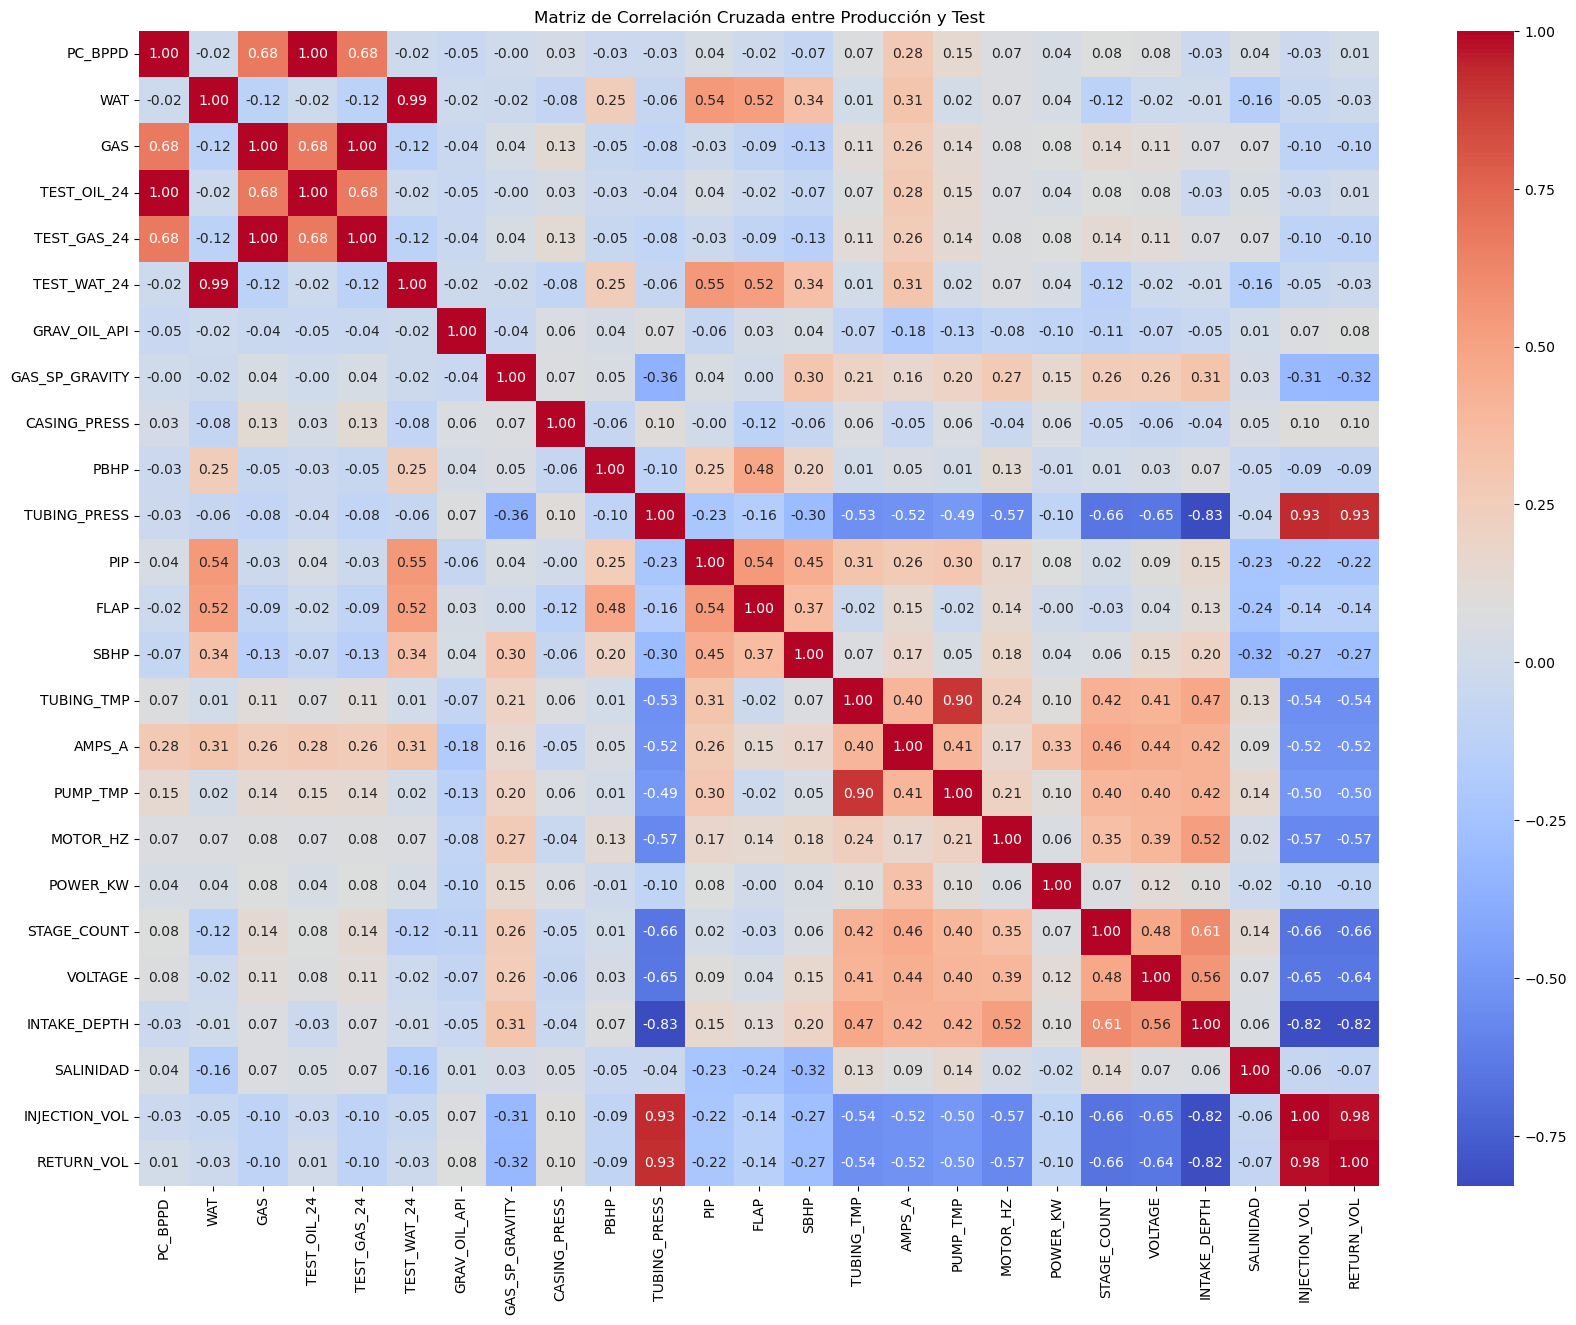

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Función para imputar la media o mediana agrupada por COMP_S_NAME
def impute_grouped_data(df, column, method='mean'):
    if method == 'median':
        return df.groupby('COMP_S_NAME')[column].transform(lambda x: x.fillna(x.median()))
    elif method == 'linear':
        return df[column].interpolate(method='linear')
    else:
        return df.groupby('COMP_S_NAME')[column].transform(lambda x: x.fillna(x.mean()))

# Cargar las bases de datos
produccion_df = pd.read_csv("produccion(1).csv")
test_df = pd.read_csv("TEST21.csv")

# Eliminar duplicados
produccion_df = produccion_df.drop_duplicates()
test_df = test_df.drop_duplicates()

# Eliminar filas con valores faltantes en columnas críticas
critical_columns_produccion = ['ANIO', 'MES', 'DIAS', 'OPERACION', 'ACTIVO', 'BLOQUE_N', 'ROUTE_NAME', 'PAD', 'POZO', 'COMP_S_NAME']
critical_columns_test = ['BSW', 'CASING_PRESS', 'PBHP', 'TUBING_PRESS', 'PIP', 'FLAP', 'SBHP', 'TUBING_TMP', 'AMPS_A', 'PUMP_TMP', 'MOTOR_HZ', 'POWER_KW', 'STAGE_COUNT', 'VOLTAGE', 'INTAKE_DEPTH', 'PUMP_TYPE', 'SALINIDAD', 'INJECTION_VOL', 'RETURN_VOL']

produccion_df = produccion_df.dropna(subset=critical_columns_produccion)
test_df = test_df.dropna(subset=critical_columns_test)

# Imputar valores faltantes en columnas seleccionadas con el método recomendado
produccion_df['PC_BPPD'] = impute_grouped_data(produccion_df, 'PC_BPPD', method='median')
produccion_df['WAT'] = impute_grouped_data(produccion_df, 'WAT', method='median')
produccion_df['GAS'] = impute_grouped_data(produccion_df, 'GAS', method='linear')

test_df['GRAV_OIL_API'] = impute_grouped_data(test_df, 'GRAV_OIL_API', method='linear')
test_df['GAS_SP_GRAVITY'] = impute_grouped_data(test_df, 'GAS_SP_GRAVITY', method='linear')

# Suponiendo que 'produccion_df' y 'test_df' ya están cargados y limpios

# Emparejar los datos por 'COMP_S_NAME' y alinear las fechas

combined_df = pd.merge(produccion_df, test_df, on='COMP_S_NAME', how='inner')
combined_df['DIAS'] = pd.to_datetime(combined_df['DIAS'],format='%d-%b-%y')
combined_df['EFF_DT'] = pd.to_datetime(combined_df['EFF_DT'], format='%Y-%m-%d')
combined_df = combined_df[combined_df['DIAS'] == combined_df['EFF_DT']]

# Seleccionar las columnas relevantes
columns_combined = ['PC_BPPD', 'WAT', 'GAS', 'TEST_OIL_24', 'TEST_GAS_24', 'TEST_WAT_24', 'GRAV_OIL_API', 'GAS_SP_GRAVITY', 'CASING_PRESS', 'PBHP', 'TUBING_PRESS', 'PIP', 'FLAP', 'SBHP', 'TUBING_TMP', 'AMPS_A', 'PUMP_TMP', 'MOTOR_HZ', 'POWER_KW', 'STAGE_COUNT', 'VOLTAGE', 'INTAKE_DEPTH', 'SALINIDAD', 'INJECTION_VOL', 'RETURN_VOL']

# Calcular la matriz de correlación
correlation_matrix_combined = combined_df[columns_combined].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix_combined, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación Cruzada entre Producción y Test')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


VISULIZACIÓN DE DATOS

C:\Users\perezgab\AppData\Local\Temp\ipykernel_19420\659956574.py:41: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  produccion_df['DIAS'] = pd.to_datetime(produccion_df['DIAS'])


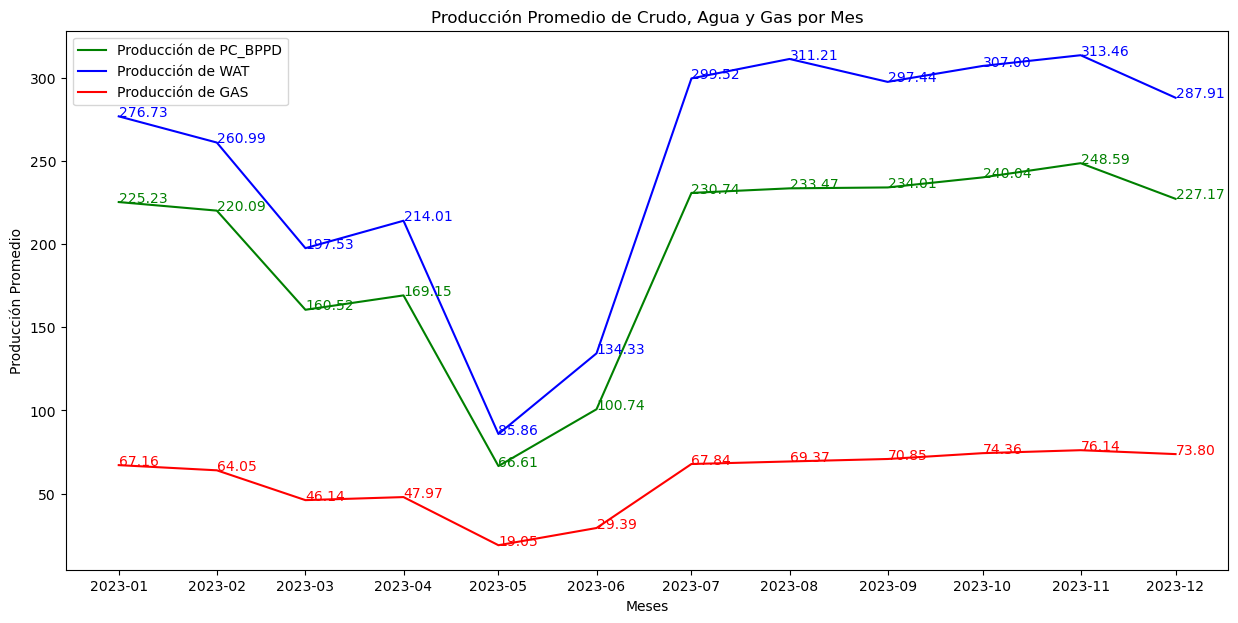

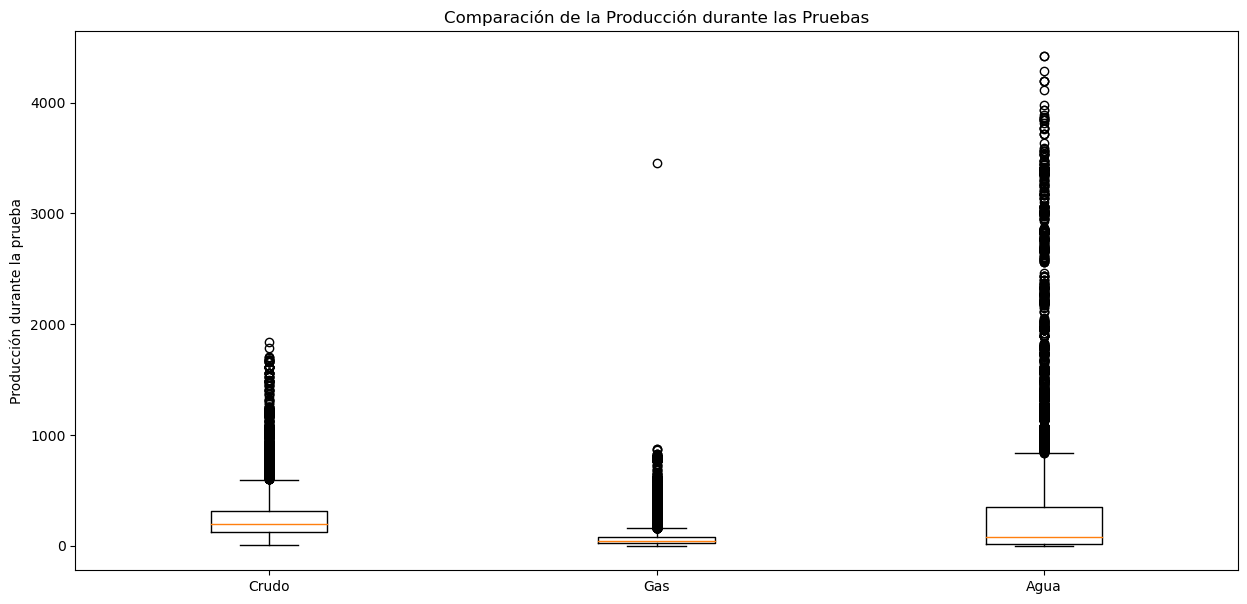

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Función para imputar la media o mediana agrupada por COMP_S_NAME
def impute_grouped_data(df, column, method='mean'):
    if method == 'median':
        return df.groupby('COMP_S_NAME')[column].transform(lambda x: x.fillna(x.median()))
    elif method == 'linear':
        return df[column].interpolate(method='linear')
    else:
        return df.groupby('COMP_S_NAME')[column].transform(lambda x: x.fillna(x.mean()))

# Cargar las bases de datos
produccion_df = pd.read_csv("produccion(1).csv")
test_df = pd.read_csv("TEST21.csv")

# Eliminar duplicados
produccion_df = produccion_df.drop_duplicates()
test_df = test_df.drop_duplicates()

# Eliminar filas con valores faltantes en columnas no críticas
critical_columns_produccion = ['ANIO', 'MES', 'DIAS', 'OPERACION', 'ACTIVO', 'BLOQUE_N', 'ROUTE_NAME', 'PAD', 'POZO', 'COMP_S_NAME']
critical_columns_test = ['BSW', 'CASING_PRESS', 'PBHP', 'TUBING_PRESS', 'PIP', 'FLAP', 'SBHP', 'TUBING_TMP', 'AMPS_A', 'PUMP_TMP', 'MOTOR_HZ', 'POWER_KW', 'STAGE_COUNT', 'VOLTAGE', 'INTAKE_DEPTH', 'PUMP_TYPE', 'SALINIDAD', 'INJECTION_VOL', 'RETURN_VOL']

produccion_df = produccion_df.dropna(subset=critical_columns_produccion)
test_df = test_df.dropna(subset=critical_columns_test)

# Imputar valores faltantes en columnas seleccionadas con el método recomendado
produccion_df['PC_BPPD'] = impute_grouped_data(produccion_df, 'PC_BPPD', method='median')
produccion_df['WAT'] = impute_grouped_data(produccion_df, 'WAT', method='median')
produccion_df['GAS'] = impute_grouped_data(produccion_df, 'GAS', method='linear')

test_df['GRAV_OIL_API'] = impute_grouped_data(test_df, 'GRAV_OIL_API', method='linear')
test_df['GAS_SP_GRAVITY'] = impute_grouped_data(test_df, 'GAS_SP_GRAVITY', method='linear')

# Los datos están ahora limpios y listos para su uso posterior en el código

# Convertir 'DIAS' a formato de fecha y extraer el mes
produccion_df['DIAS'] = pd.to_datetime(produccion_df['DIAS'])
produccion_df['MES'] = produccion_df['DIAS'].dt.to_period('M')

# Gráfico de líneas para la producción a lo largo del tiempo, agrupado por mes
plt.figure(figsize=(15, 7))  # Tamaño más grande para mejor visualización
for producto, color in zip(['PC_BPPD', 'WAT', 'GAS'], ['green', 'blue', 'red']):
    monthly_data = produccion_df.groupby('MES')[producto].mean()
    plt.plot(monthly_data.index.to_timestamp(), monthly_data, label=f'Producción de {producto}', color=color)
    # Agregar etiquetas de datos a cada punto
    for x, y in zip(monthly_data.index.to_timestamp(), monthly_data):
        plt.text(x, y, f'{y:.2f}', color=color)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formato de fecha como Año-Mes
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Localizador principal en meses
plt.xlabel('Meses')
plt.ylabel('Producción Promedio')
plt.title('Producción Promedio de Crudo, Agua y Gas por Mes')
plt.legend()
plt.show()

# Boxplot para la producción durante las pruebas
plt.figure(figsize=(15, 7))  # Tamaño más grande para mejor visualización
plt.boxplot([test_df['TEST_OIL_24'], test_df['TEST_GAS_24'], test_df['TEST_WAT_24']], labels=['Crudo', 'Gas', 'Agua'])
plt.ylabel('Producción durante la prueba')
plt.title('Comparación de la Producción durante las Pruebas')
plt.show()